In [ ]:
pip install monai nibabel torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

Loading: /content/drive/MyDrive/Hammers/a01.nii.gz
Loading: /content/drive/MyDrive/LOHIRESGAN/a01.nii_synth.nii.gz
Loading: /content/drive/MyDrive/LOWGAN/a01_pix2pix.nii.gz
Loading: /content/drive/MyDrive/RESNET/a01_enhanced.nii.gz
Loading: /content/drive/MyDrive/Hammers/a10.nii.gz
Loading: /content/drive/MyDrive/LOHIRESGAN/a10.nii_synth.nii.gz
Loading: /content/drive/MyDrive/LOWGAN/a10_pix2pix.nii.gz
Loading: /content/drive/MyDrive/RESNET/a10_enhanced.nii.gz
Loading: /content/drive/MyDrive/Hammers/a15.nii.gz
Loading: /content/drive/MyDrive/LOHIRESGAN/a15.nii_synth.nii.gz
Loading: /content/drive/MyDrive/LOWGAN/a15_pix2pix.nii.gz
Loading: /content/drive/MyDrive/RESNET/a15_enhanced.nii.gz
Loading: /content/drive/MyDrive/Hammers/a24.nii.gz
Loading: /content/drive/MyDrive/LOHIRESGAN/a24.nii_synth.nii.gz
Loading: /content/drive/MyDrive/LOWGAN/a24_pix2pix.nii.gz
Loading: /content/drive/MyDrive/RESNET/a24_enhanced.nii.gz
Loading: /content/drive/MyDrive/Hammers/a27.nii.gz
Loading: /content/dri

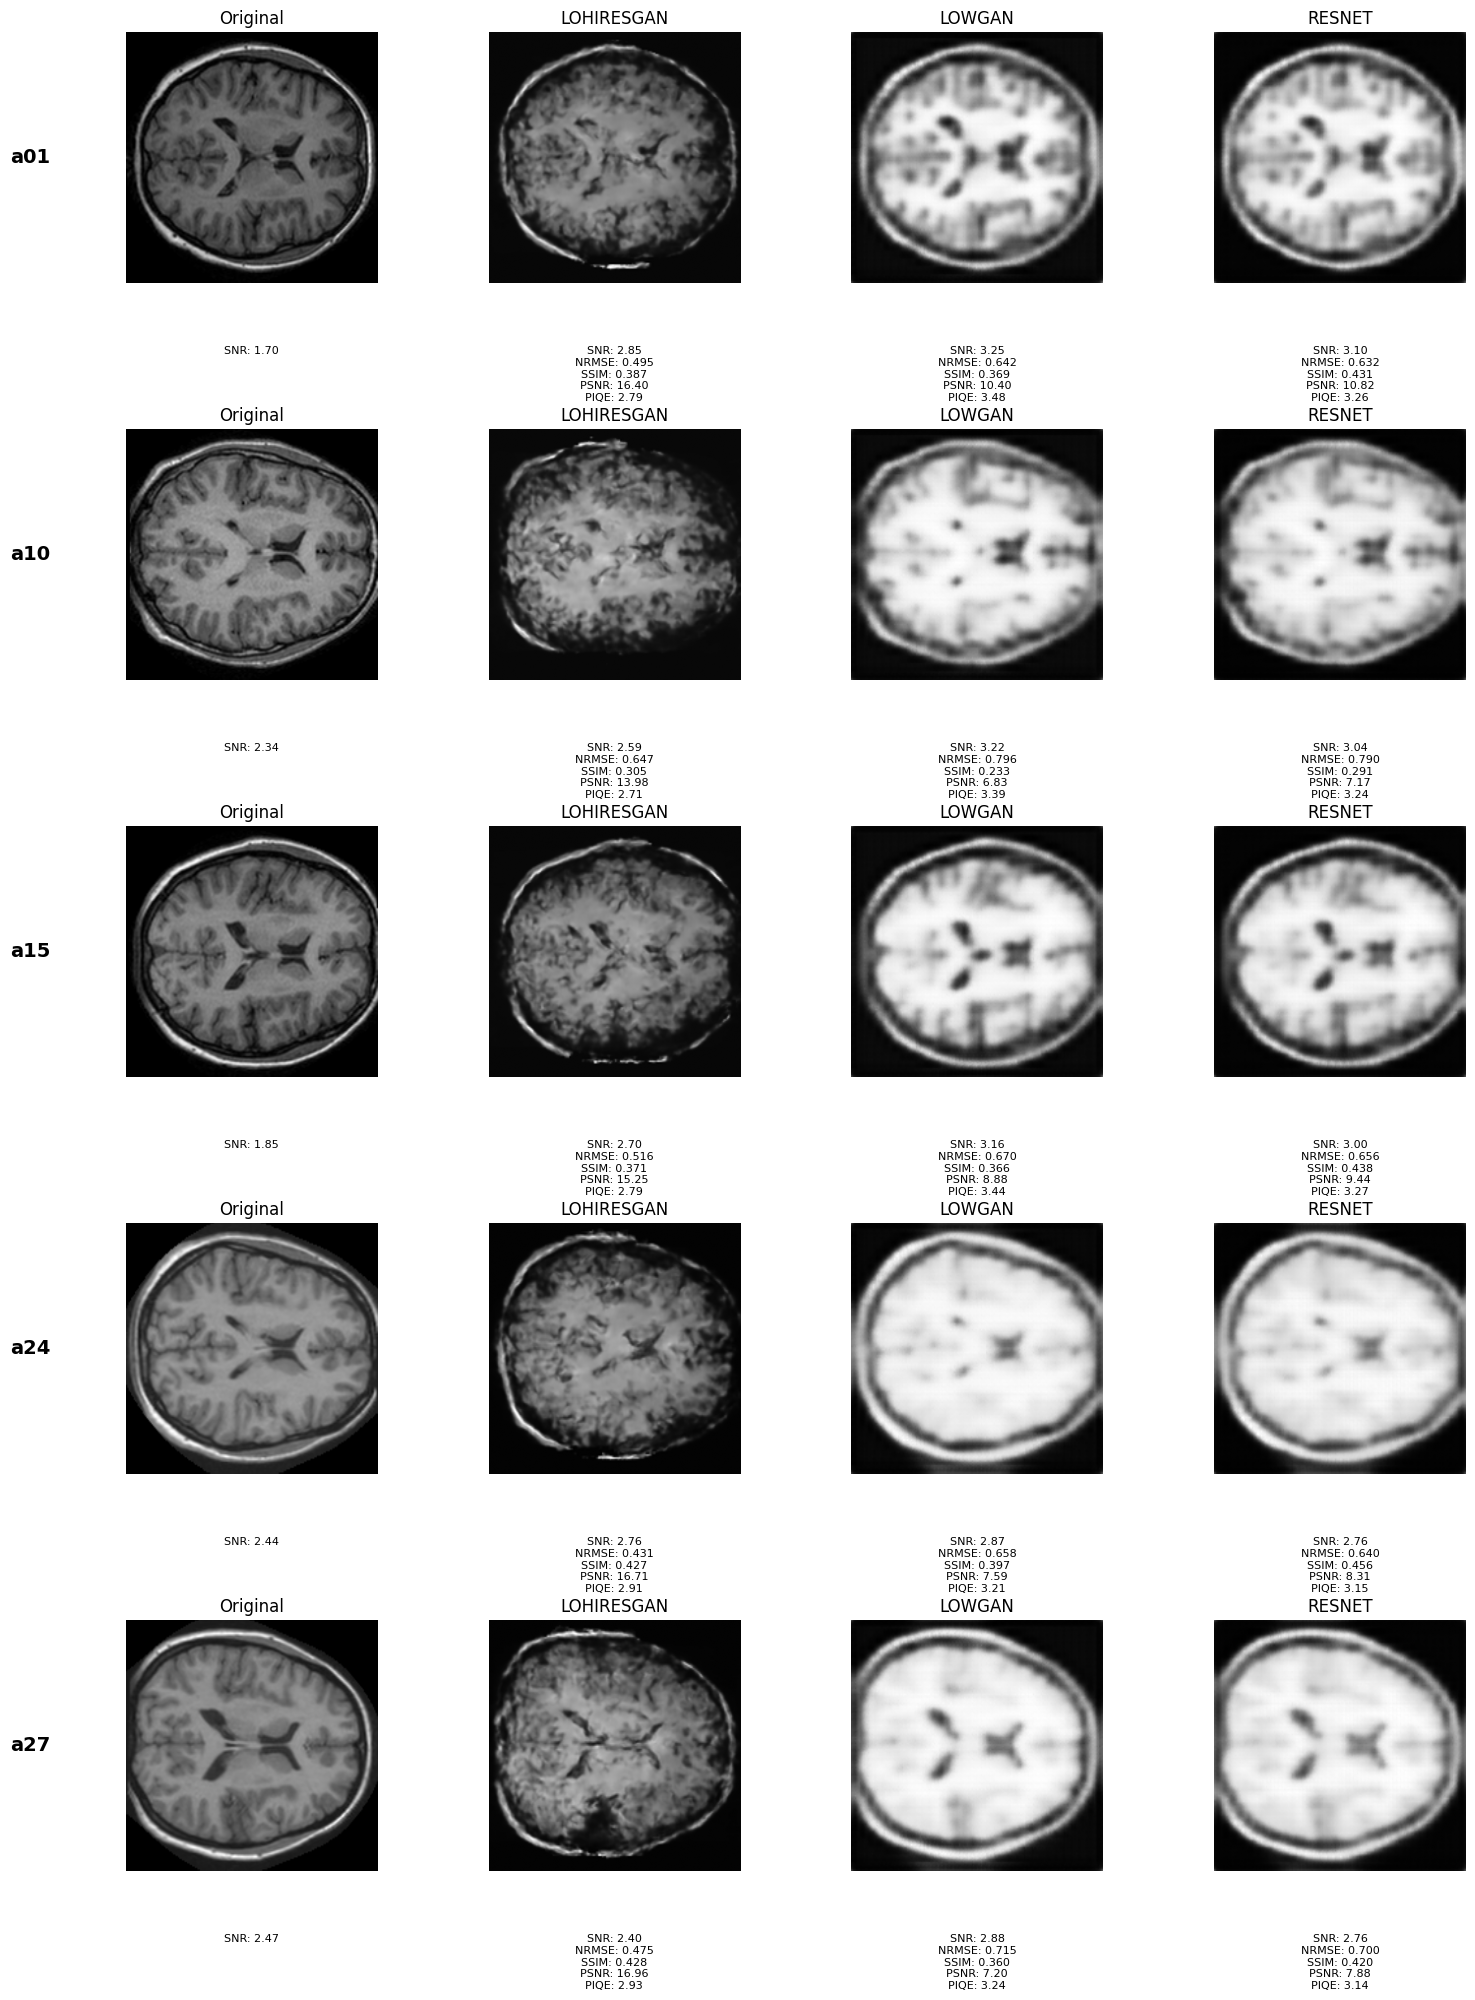

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from skimage.transform import resize

# Set the Selected_Metrics_a01_a10_a15_a24_a27.csv path
base_path = '/content/drive/MyDrive'
metrics_csv = os.path.join(base_path, 'Evaluation_image/Selected_Metrics_a01_a10_a15_a24_a27.csv')

# Set the image path
paths = {
    'Original': os.path.join(base_path, 'Hammers'),
    'LOHIRESGAN': os.path.join(base_path, 'LOHIRESGAN'),
    'LOWGAN': os.path.join(base_path, 'LOWGAN'),
    'RESNET': os.path.join(base_path, 'RESNET'),
}

suffix_map = {
    'Original': '.nii.gz',
    'LOHIRESGAN': '.nii_synth.nii.gz',
    'LOWGAN': '_pix2pix.nii.gz',
    'RESNET': '_enhanced.nii.gz'
}

# Read all metrics
metrics_df = pd.read_csv(metrics_csv, index_col=0)

# Rename the metrics
metrics_df.rename(columns={
    'SNR_SNR(original)': 'SNR_Original',
    'SNR_SNR(LOHIRESGAN)': 'SNR_LOHIRESGAN',
    'SNR_SNR(LOWGAN)': 'SNR_LOWGAN',
    'SNR_SNR(RESNET)': 'SNR_RESNET'
}, inplace=True)

samples = ['a01', 'a10', 'a15', 'a24', 'a27']
methods = ['Original', 'LOHIRESGAN', 'LOWGAN', 'RESNET']

n_rows = len(samples)
n_cols = len(methods)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
fig.subplots_adjust(hspace=0.6)

if n_rows == 1 and n_cols == 1:
    axes = np.array([[axes]])
elif n_rows == 1:
    axes = axes[np.newaxis, :]
elif n_cols == 1:
    axes = axes[:, np.newaxis]

for row_idx, sample in enumerate(samples):
    for col_idx, method in enumerate(methods):
        ax = axes[row_idx, col_idx]

        folder = paths[method]
        suffix = suffix_map[method]
        filename = sample + suffix
        img_path = os.path.join(folder, filename)

        print("Loading:", img_path)
        assert os.path.exists(img_path), f"File not found: {img_path}"

        img = nib.load(img_path).get_fdata()
        img = (img - img.min()) / (img.max() - img.min() + 1e-8)
        slice_img = img[:, :, img.shape[2] // 2]
        slice_img = resize(slice_img, (256, 256), preserve_range=True)

        ax.imshow(slice_img, cmap='gray')
        ax.axis('off')

        # Display sample name on the left side
        if col_idx == 0:
            ax.text(-0.3, 0.5, sample, fontsize=14, rotation=0, weight='bold',
                    ha='right', va='center', transform=ax.transAxes)

        try:
            if method == 'Original':
                # Only SNR for Original
                snr_val = metrics_df.at[sample, 'SNR_Original']
                metric_str = f"SNR: {snr_val:.2f}"
            else:
                snr_val = metrics_df.at[sample, f'SNR_{method}']
                nrmse_val = metrics_df.at[sample, f'NRMSE_{method}']
                ssim_val = metrics_df.at[sample, f'SSIM_{method}']
                psnr_val = metrics_df.at[sample, f'PSNR_{method}']
                piqe_val = metrics_df.at[sample, f'PIQE_{method}']
                metric_str = (
                    f"SNR: {snr_val:.2f}\n"
                    f"NRMSE: {nrmse_val:.3f}\n"
                    f"SSIM: {ssim_val:.3f}\n"
                    f"PSNR: {psnr_val:.2f}\n"
                    f"PIQE: {piqe_val:.2f}"
                )
        except Exception as e:
            print(f"ERROR on {sample}-{method}: {e}")
            metric_str = "No data"

        ax.set_title(method, fontsize=12)
        ax.text(0.5, -0.25, metric_str,
                ha='center', va='top',
                transform=ax.transAxes,
                fontsize=8, wrap=True)

plt.tight_layout()
save_path = os.path.join(base_path, 'Evaluation_image/MultiImage_Comparison.png')
plt.savefig(save_path, dpi=300)
plt.show()
